<a href="https://colab.research.google.com/github/VU22CSEN0101583/montecarlosimulations/blob/main/Monte_carlo_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd


In [3]:
# Parameters
ticker = "AAPL"   # You can change to MSFT, TSLA, etc.
start_date = "2018-01-01"
end_date = "2024-12-31"

# Download historical stock data
data = yf.download(ticker, start=start_date, end=end_date)
data = data['Close']

# Display last few rows
data.tail()

/tmp/ipython-input-2798195186.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2024-12-23,254.367035
2024-12-24,257.286652
2024-12-26,258.103729
2024-12-27,254.685883
2024-12-30,251.307877


In [5]:
mean = returns.mean().item()
std = returns.std().item()

print(f"Mean daily return: {mean:.5f}")
print(f"Standard deviation of returns: {std:.5f}")

Mean daily return: 0.00123
Standard deviation of returns: 0.01925


In [8]:
# Simulation parameters
num_simulations = 1000    # number of random scenarios
time_horizon = 252        # trading days in 1 year
last_price = data.iloc[-1]

# Run simulations
simulations = []
for _ in range(num_simulations):
    prices = [last_price]
    for _ in range(time_horizon):
        prices.append(prices[-1] * (1 + np.random.normal(mean, std)))
    simulations.append(prices)

simulations = np.array(simulations)

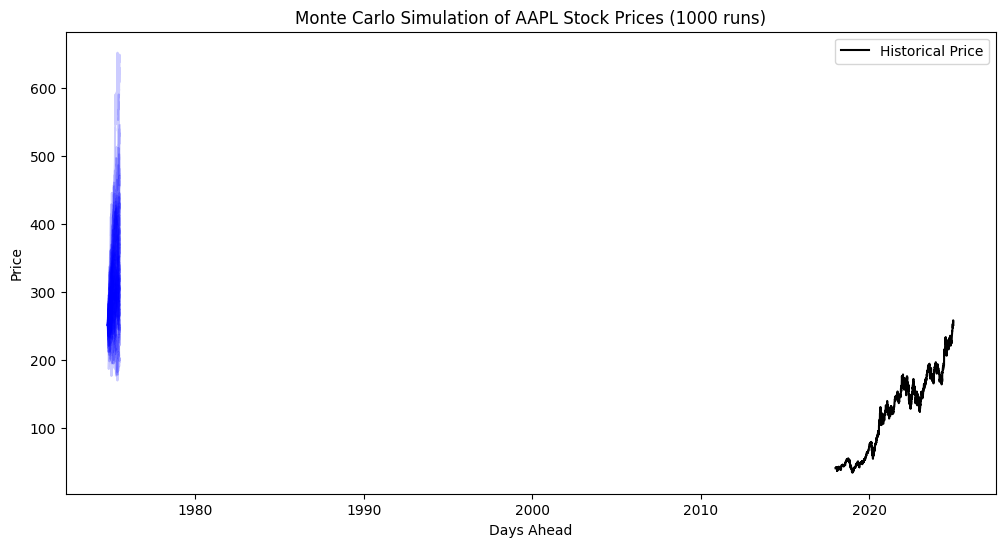

In [9]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data, label="Historical Price", color="black")

for i in range(50):  # plot only first 50 paths for clarity
    plt.plot(range(len(data), len(data)+time_horizon+1), simulations[i], alpha=0.2, color="blue")

plt.title(f"Monte Carlo Simulation of {ticker} Stock Prices ({num_simulations} runs)")
plt.xlabel("Days Ahead")
plt.ylabel("Price")
plt.legend()
plt.show()
